# House Prices: Advanced Regression Techniques

Hello everyone!

The key objective is to use feature engineering to improve performance for tree-based and non-tree models.

## Load packages and data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns

from scipy import stats

In [2]:
X_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

In [3]:
X_train.shape, X_test.shape

((1460, 80), (1459, 79))

In [4]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## EDA

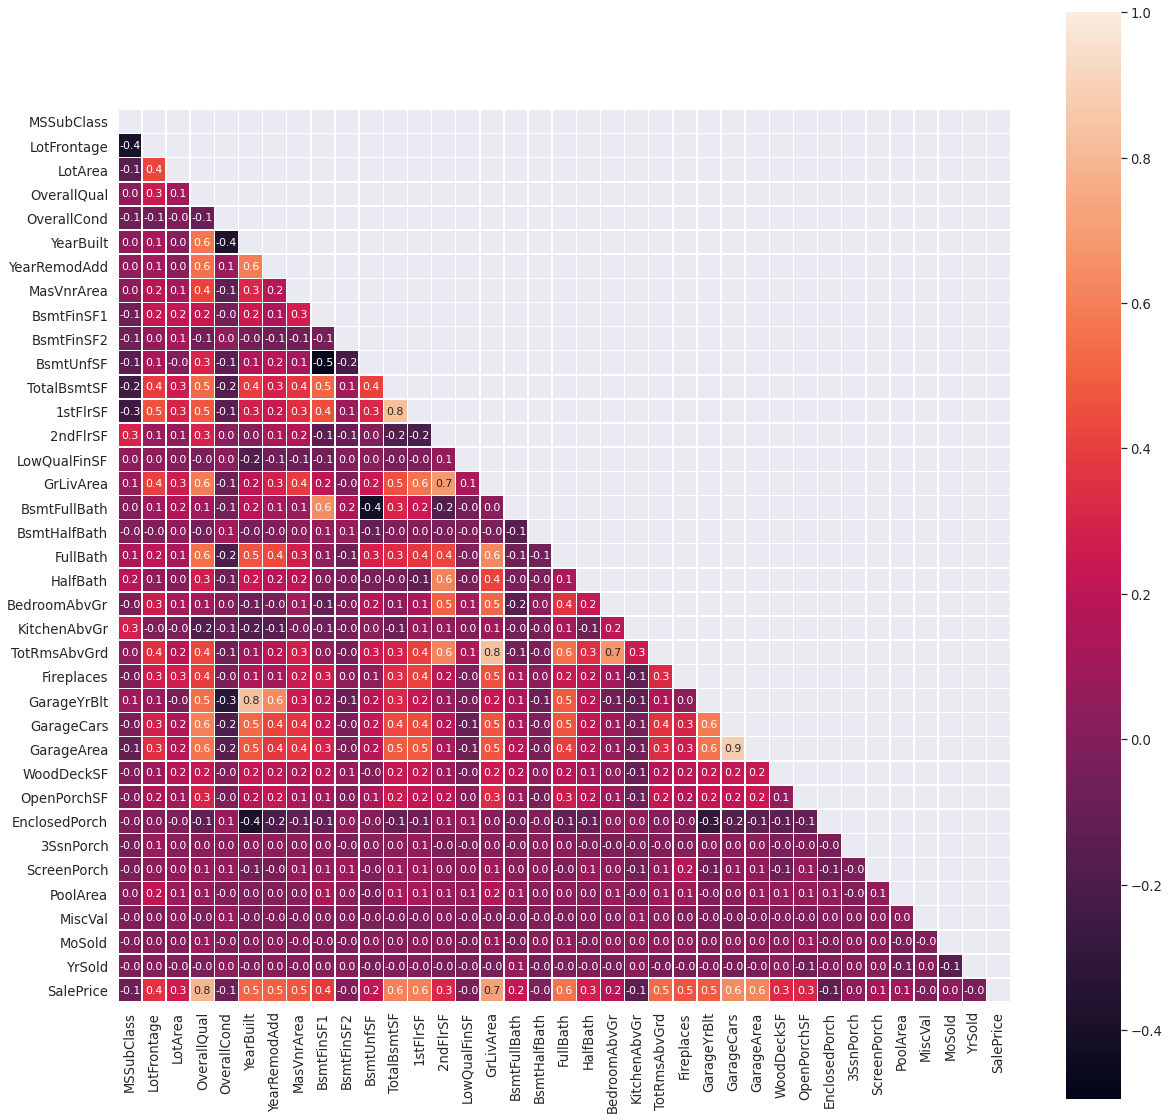

In [6]:
correlation_train=X_train.corr()
sns.set(font_scale=1.2)
mask = np.triu(correlation_train.corr())
plt.figure(figsize = (20,20))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 11},fmt='.1f', linewidths=.5, square=True, mask=mask)

### Target log-transformation

In [7]:
y = X_train.SalePrice.reset_index(drop=True)
X_train.drop(['SalePrice'], axis=1, inplace=True)

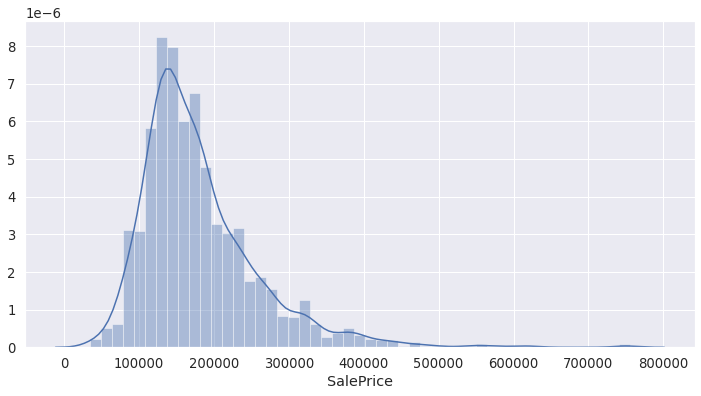

In [8]:
plt.figure(figsize=(12,6))
sns.distplot(y)

Skewness: 1.883


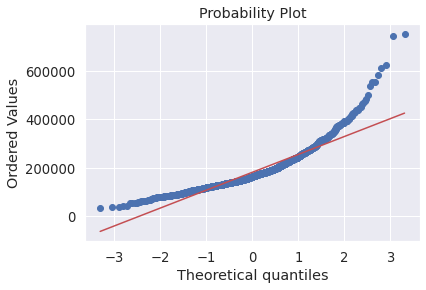

In [9]:
stats.probplot(y, plot=plt)
print(f"Skewness: {y.skew():.3f}")

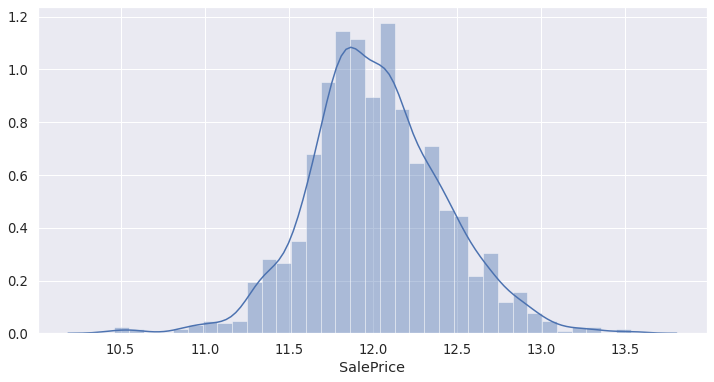

In [10]:
y = np.log1p(y)            
plt.figure(figsize=(12,6))
sns.distplot(y)

Skewness: 0.121


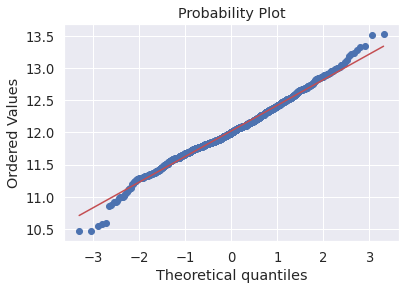

In [11]:
stats.probplot(y, plot=plt)
print(f"Skewness: {y.skew():.3f}")

### Detecting missing values

In [12]:
train_test = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
train_test.shape

(2919, 79)

In [13]:
# Find Missing Ratio of Dataset
missing = (train_test.isnull().sum() / len(train_test)) * 100
missing = missing.drop(missing[missing == 0].index).sort_values(ascending=False)[:35]

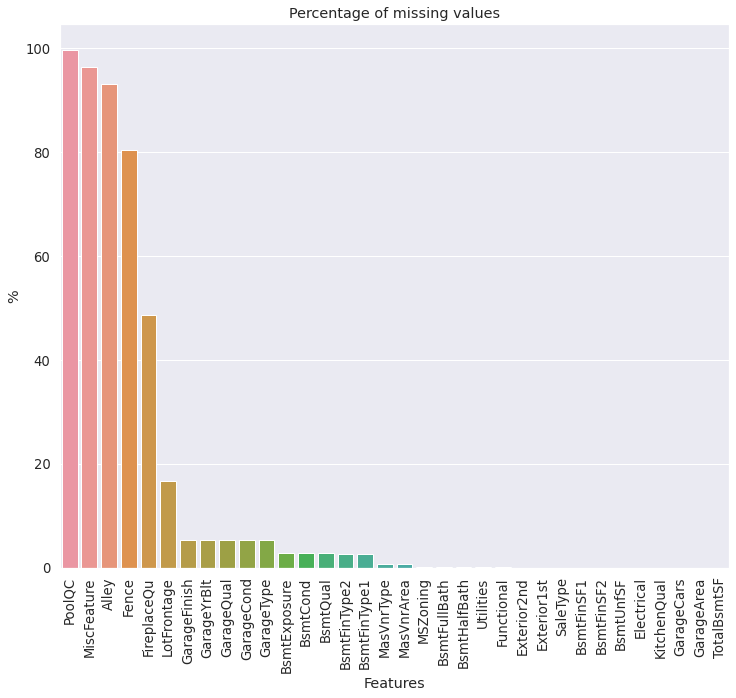

In [14]:
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='90')
sns.barplot(x=missing.index, y=missing)
plt.xlabel('Features')
plt.ylabel('%')
plt.title('Percentage of missing values');

### Imputing nominal categorical features

In [15]:
train_test['MSSubClass'] = train_test['MSSubClass'].astype(str)
train_test['MoSold'] = train_test['MoSold'].astype(str)
train_test['YrSold'] = train_test['YrSold'].astype(str)

In [16]:
none = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'GarageType','MasVnrType']
for col in none:
    train_test[col].replace(np.nan, 'None', inplace=True)

In [17]:
train_test['MSZoning'] = train_test.groupby('MSSubClass')['MSZoning'].transform(
    lambda x: x.fillna(x.mode()[0]))

In [18]:
freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd',
    'SaleType', 'Utilities'
]
for col in freq_cols:
    train_test[col].replace(np.nan, train_test[col].mode()[0], inplace=True)

### Encoding ordinal categorical features

In [19]:
qualcond = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
for f in qualcond:
    train_test[f] = train_test[f].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
train_test['BsmtExposure'] = train_test['BsmtExposure'].replace({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0})
train_test['GarageFinish'] = train_test['GarageFinish'].replace({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})
basement = ['BsmtFinType1', 'BsmtFinType2']
for f in basement:
    train_test[f] = train_test[f].replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})

In [20]:
functional = {'Typ': 3, 'Min1': 2.5, 'Min2': 2, 'Mod': 1.5, 'Maj1': 1, 'Maj2': 0.5, 'Sev': 0, 'Sal': 0}
train_test['Functional'] = train_test['Functional'].replace(functional)
train_test['CentralAir'] = train_test['CentralAir'].replace({'Y':1, 'N':0})

In [21]:
train_test.isnull().sum().sort_values(ascending=False)[:22]

FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
BsmtUnfSF          1
GarageArea         1
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
TotalBsmtSF        1
KitchenQual        1
dtype: int64

Dropping features with one value - Utilities, Street, PoolQC

In [22]:
train_test = train_test.drop(['Utilities', 'Street', 'PoolQC', ], axis=1)

### Removing outliers

In [23]:
outliers = [ 30, 462, 523, 588, 632, 1298, 1324]
train_test = train_test.drop(train_test.index[outliers])
linear_train_test = train_test.copy()
y = y.drop(y.index[outliers])

### Encoding nominal categorical features and Imputing missing values (Tree-based)

In [24]:
cat_cols = [cname for cname in train_test.columns if  train_test[cname].dtype == "object"]
cat_cols
train = train_test.iloc[:1453]
test = train_test.iloc[1453:]

CatBoostEncoder replaces a categorical value with the average value of the target from the rows before it. It works well with XGBoost and LightGBM

In [25]:
from category_encoders import CatBoostEncoder
cbe = CatBoostEncoder()
train[cat_cols] = cbe.fit_transform(train[cat_cols], y)
test[cat_cols] = cbe.transform(test[cat_cols])

In [26]:
train_test = pd.concat([train, test]).reset_index(drop=True)

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [27]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=7, weights='distance', missing_values=np.nan)
imp_train_test = imp.fit_transform(train_test)

In [28]:
train_test = pd.DataFrame(imp_train_test, columns=train_test.columns)

In [29]:
missing = ['GarageCars', 'BsmtFinSF1', 'GarageArea', 'BsmtUnfSF', 'KitchenQual',
       'BsmtFinSF2', 'TotalBsmtSF', 'Functional', 'BsmtHalfBath',
       'BsmtFullBath', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageQual', 'GarageFinish',
       'GarageYrBlt', 'GarageCond', 'LotFrontage', 'FireplaceQu']

In [30]:
train_test[missing] = train_test[missing].apply(lambda x: np.round(x))
train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.026350,12.026350,65.0,8450.0,12.026350,12.026350,12.026350,12.026350,12.026350,12.026350,12.026350,12.026350,12.026350,12.026350,7.0,5.0,2003.0,2003.0,12.026350,12.026350,12.026350,12.026350,12.026350,196.0,4.0,3.0,12.026350,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,12.026350,5.0,1.0,12.026350,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,4.0,8.0,3.0,0.0,3.0,12.026350,2003.0,2.0,2.0,548.0,3.0,3.0,12.026350,0.0,61.0,0.0,0.0,0.0,0.0,12.026350,12.026350,0.0,12.026350,12.026350,12.026350,12.026350
1,12.026350,12.137025,80.0,9600.0,12.137025,12.137025,12.137025,12.026350,12.137025,12.026350,12.026350,12.137025,12.137025,12.026350,6.0,8.0,1976.0,1976.0,12.137025,12.137025,12.026350,12.026350,12.026350,0.0,3.0,3.0,12.026350,4.0,3.0,4.0,5.0,978.0,1.0,0.0,284.0,1262.0,12.137025,5.0,1.0,12.137025,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,3.0,1.0,3.0,12.137025,1976.0,2.0,2.0,460.0,3.0,3.0,12.137025,298.0,0.0,0.0,0.0,0.0,0.0,12.137025,12.137025,0.0,12.026350,12.026350,12.137025,12.137025
2,12.137025,12.127689,68.0,11250.0,12.127689,12.026350,12.127689,12.137025,12.127689,12.137025,12.137025,12.127689,12.127689,12.137025,7.0,5.0,2001.0,2002.0,12.127689,12.127689,12.137025,12.137025,12.137025,162.0,4.0,3.0,12.137025,4.0,3.0,2.0,6.0,486.0,1.0,0.0,434.0,920.0,12.127689,5.0,1.0,12.127689,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,4.0,6.0,3.0,1.0,3.0,12.127689,2001.0,2.0,2.0,608.0,3.0,3.0,12.127689,0.0,42.0,0.0,0.0,0.0,0.0,12.127689,12.127689,0.0,12.026350,12.137025,12.127689,12.127689
3,12.026350,12.175059,60.0,9550.0,12.175059,12.171761,12.175059,12.026350,12.175059,12.026350,12.197074,12.175059,12.175059,12.197074,7.0,5.0,1915.0,1970.0,12.175059,12.175059,12.026350,12.026350,12.067683,0.0,3.0,3.0,12.026350,3.0,4.0,1.0,5.0,216.0,1.0,0.0,540.0,756.0,12.175059,4.0,1.0,12.175059,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,4.0,7.0,3.0,1.0,4.0,12.026350,1998.0,1.0,3.0,642.0,3.0,3.0,12.175059,0.0,35.0,272.0,0.0,0.0,0.0,12.175059,12.175059,0.0,12.137025,12.026350,12.175059,12.026350
4,12.197074,12.109928,84.0,14260.0,12.109928,12.064309,12.109928,12.067683,12.109928,12.026350,12.110156,12.109928,12.109928,12.110156,8.0,5.0,2000.0,2000.0,12.109928,12.109928,12.197074,12.197074,12.197074,350.0,4.0,3.0,12.197074,4.0,3.0,3.0,6.0,655.0,1.0,0.0,490.0,1145.0,12.109928,5.0,1.0,12.109928,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,4.0,9.0,3.0,1.0,3.0,12.175059,2000.0,2.0,3.0,836.0,3.0,3.0,12.109928,192.0,84.0,0.0,0.0,0.0,0.0,12.109928,12.109928,0.0,12.026350,12.197074,12.109928,12.175059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,11.810622,11.694424,21.0,1936.0,12.039129,11.938357,12.025176,12.004945,12.022868,11.505189,12.044533,12.028295,11.779651,12.186496,4.0,7.0,1970.0,1970.0,11.985146,12.021405,12.203282,12.200281,11.899549,0.0,3.0,3.0,11.872515,3.0,3.0,1.0,1.0,0.0,1.0,0.0,546.0,546.0,12.034463,4.0,1.0,12.064123,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,

Feature Generation

In [31]:
train_test['YearsSinceBuilt'] = train_test['YrSold'].astype(int) - train_test['YearBuilt']
train_test['YearsSinceRemod'] = train_test['YrSold'].astype(int) - train_test['YearRemodAdd']
train_test['TotalSF'] = train_test['TotalBsmtSF'] + train_test['1stFlrSF'] + train_test['2ndFlrSF']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test['TotalPorchArea'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] +
                              train_test['EnclosedPorch'] + train_test['ScreenPorch'] +
                              train_test['WoodDeckSF'])
train_test['TotalOccupiedArea'] = train_test['TotalSF'] + train_test['TotalPorchArea']
train_test['OtherRooms'] = train_test['TotRmsAbvGrd'] - train_test['BedroomAbvGr'] - train_test['KitchenAbvGr']
train_test['haspool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['has2ndfloor'] = train_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['hasgarage'] = train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['hasbsmt'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['hasfireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
print(train_test.shape)
train = train_test.iloc[:1453]
test = train_test.iloc[1453:]
print(train.shape, test.shape, y.shape)

(2912, 88)
(1453, 88) (1459, 88) (1453,)


### Encoding nominal categorical features, Imputing missing values and Scaling (Non-Tree)

In [33]:
ohe = pd.get_dummies(linear_train_test).reset_index(drop=True)

imp = KNNImputer(n_neighbors=7, weights='distance', missing_values=np.nan)
imp_linear_train_test = imp.fit_transform(ohe)

linear_train_test = pd.DataFrame(imp_linear_train_test, columns=ohe.columns)

linear_train_test[missing] = linear_train_test[missing].apply(lambda x: np.round(x))

In [34]:
linear_train_test['TotalSF'] = linear_train_test['TotalBsmtSF'] + linear_train_test['1stFlrSF'] + linear_train_test['2ndFlrSF']

linear_train_test['Total_Bathrooms'] = (linear_train_test['FullBath'] + (0.5 * linear_train_test['HalfBath']) +
                               linear_train_test['BsmtFullBath'] + (0.5 * linear_train_test['BsmtHalfBath']))

linear_train_test['TotalPorchArea'] = (linear_train_test['OpenPorchSF'] + linear_train_test['3SsnPorch'] +
                              linear_train_test['EnclosedPorch'] + linear_train_test['ScreenPorch'] +
                              linear_train_test['WoodDeckSF'])
linear_train_test['TotalOccupiedArea'] = linear_train_test['TotalSF'] + linear_train_test['TotalPorchArea']
linear_train_test['OtherRooms'] = linear_train_test['TotRmsAbvGrd'] - linear_train_test['BedroomAbvGr'] - linear_train_test['KitchenAbvGr']
linear_train_test['haspool'] = linear_train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
linear_train_test['has2ndfloor'] = linear_train_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
linear_train_test['hasgarage'] = linear_train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
linear_train_test['hasbsmt'] = linear_train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
linear_train_test['hasfireplace'] = linear_train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
linear_train_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,To

In [35]:
from sklearn.preprocessing import StandardScaler

lin_train = linear_train_test.iloc[:1453]
lin_test = linear_train_test.iloc[1453:]


Scaler = StandardScaler()
scaled_train = Scaler.fit_transform(lin_train)
scaled_test = Scaler.transform(lin_test)

scaled_train = pd.DataFrame(scaled_train, columns=linear_train_test.columns)
scaled_test = pd.DataFrame(scaled_test, columns=linear_train_test.columns)

In [36]:
print(scaled_train.shape, scaled_test.shape, y.shape)

(1453, 270) (1459, 270) (1453,)


## Feature Selection (Tree-based)

We'll build a CatBoost model and find best features with SHAP Values

In [37]:
from catboost import CatBoostRegressor, Pool
model = CatBoostRegressor(iterations=2500,
                            learning_rate=0.03,
                            depth=6,
                            loss_function='RMSE',
                            random_seed = 10,
                            bootstrap_type='Bernoulli',
                            subsample=0.66,
                            rsm=0.7
                         )

In [38]:
model.fit(train, y, verbose=False, plot=False);

In [39]:
import shap
shap.initjs()

shap_values = model.get_feature_importance(Pool(train, y), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.force_plot(expected_value, shap_values[0,:], train.iloc[0,:])

### SHAP importance

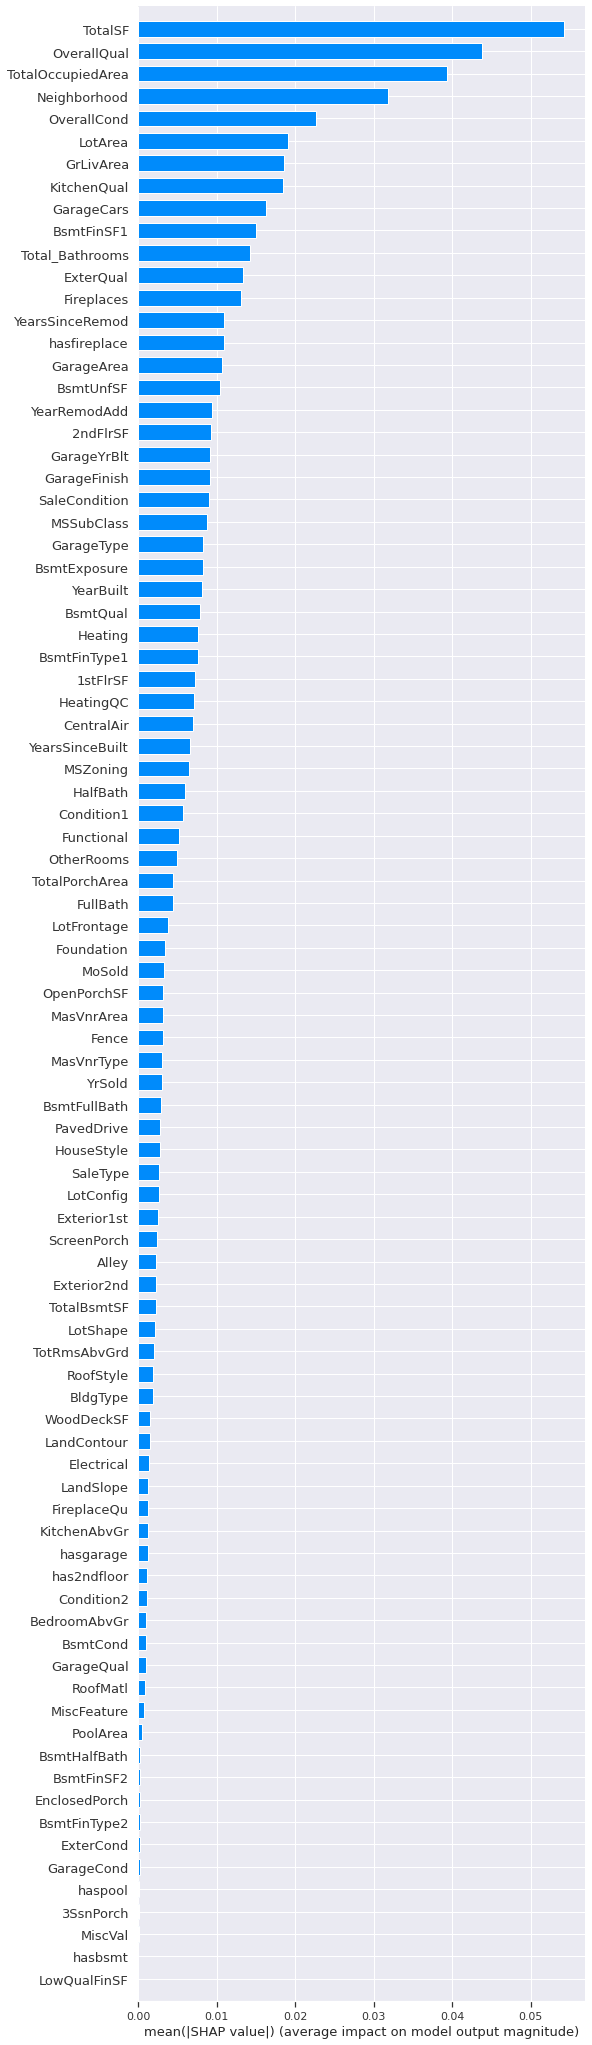

In [40]:
shap.summary_plot(shap_values, train, max_display=88,  plot_type='bar')

In [41]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df.tail(35)

,column_name,shap_importance
20,Exterior1st,0.00253359
67,ScreenPorch,0.00234612
4,Alley,0.00226488
21,Exterior2nd,0.00225639
35,TotalBsmtSF,0.00224715
5,LotShape,0.0021078
51,TotRmsAbvGrd,0.00192237
18,RoofStyle,0.00188035
12,BldgType,0.00179794
63,WoodDeckSF,0.00148896


We'll drop features with less than **1.5e-3** importance(you can change this threshold)

In [42]:
drop = importance_df[importance_df['shap_importance'] < 1.5e-3].iloc[:,0].tolist()

In [43]:
train_drop = train.drop(drop, axis=1)
test_drop = test.drop(drop, axis=1)
train_drop

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,YearsSinceBuilt,YearsSinceRemod,TotalSF,Total_Bathrooms,TotalPorchArea,TotalOccupiedArea,OtherRooms,hasfireplace
0,12.026350,12.026350,65.0,8450.0,12.026350,12.026350,12.026350,12.026350,12.026350,12.026350,12.026350,7.0,5.0,2003.0,2003.0,12.026350,12.026350,12.026350,12.026350,196.0,4.0,12.026350,4.0,1.0,6.0,706.0,150.0,856.0,12.026350,5.0,1.0,856.0,854.0,1710.0,1.0,2.0,1.0,4.0,8.0,3.0,0.0,12.026350,2003.0,2.0,2.0,548.0,12.026350,61.0,0.0,12.026350,12.026350,12.026350,12.026350,12.026350,-1991.0,-1991.0,2566.0,3.5,61.0,2627.0,4.0,0
1,12.026350,12.137025,80.0,9600.0,12.137025,12.137025,12.026350,12.026350,12.026350,12.137025,12.026350,6.0,8.0,1976.0,1976.0,12.137025,12.026350,12.026350,12.026350,0.0,3.0,12.026350,4.0,4.0,5.0,978.0,284.0,1262.0,12.137025,5.0,1.0,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,6.0,3.0,1.0,12.137025,1976.0,2.0,2.0,460.0,12.137025,0.0,0.0,12.137025,12.026350,12.026350,12.137025,12.137025,-1964.0,-1964.0,2524.0,2.5,298.0,2822.0,2.0,1
2,12.137025,12.127689,68.0,11250.0,12.127689,12.026350,12.137025,12.137025,12.137025,12.127689,12.137025,7.0,5.0,2001.0,2002.0,12.127689,12.137025,12.137025,12.137025,162.0,4.0,12.137025,4.0,2.0,6.0,486.0,434.0,920.0,12.127689,5.0,1.0,920.0,866.0,1786.0,1.0,2.0,1.0,4.0,6.0,3.0,1.0,12.127689,2001.0,2.0,2.0,608.0,12.127689,42.0,0.0,12.127689,12.026350,12.137025,12.127689,12.127689,-1989.0,-1990.0,2706.0,3.5,42.0,2748.0,2.0,1
3,12.026350,12.175059,60.0,9550.0,12.175059,12.171761,12.026350,12.026350,12.197074,12.175059,12.197074,7.0,5.0,1915.0,1970.0,12.175059,12.026350,12.026350,12.067683,0.0,3.0,12.026350,3.0,1.0,5.0,216.0,540.0,756.0,12.175059,4.0,1.0,961.0,756.0,1717.0,1.0,1.0,0.0,4.0,7.0,3.0,1.0,12.026350,1998.0,1.0,3.0,642.0,12.175059,35.0,0.0,12.175059,12.137025,12.026350,12.175059,12.026350,-1903.0,-1958.0,2473.0,2.0,307.0,2780.0,3.0,1
4,12.197074,12.109928,84.0,14260.0,12.109928,12.064309,12.067683,12.026350,12.110156,12.109928,12.110156,8.0,5.0,2000.0,2000.0,12.109928,12.197074,12.197074,12.197074,350.0,4.0,12.197074,4.0,3.0,6.0,655.0,490.0,1145.0,12.109928,5.0,1.0,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,9.0,3.0,1.0,12.175059,2000.0,2.0,3.0,836.0,12.109928,84.0,0.0,12.109928,12.026350,12.197074,12.109928,12.175059,-1988.0,-1988.0,3343.0,3.5,276.0,3619.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,12.341744,12.087695,62.0,7917.0,12.038842,11.937383,12.004406,12.155224,12.044243,12.050104,12.186059,6.0,5.0,1999.0,2000.0,11.984458,12.206387,12.210163,11.898701,0.0,3.0,12.262805,4.0,1.0,1.0,0.0,953.0,953.0,12.034170,5.0,1.0,953.0,694.0,1647.0,0.0,2.0,1.0,3.0,7.0,3.0,1.0,12.162702,1999.0,2.0,2.0,460.0,12.061253,40.0,0.0,12.059798,12.048716,12.050766,11.993085,12.006577,-1987.0,-1988.0,2600.0,2.5,40.0,2640.0,3.0,1
1449,12.056929,12.087682,85.0,13175.0,12.038866,11.937530,12.004472,12.138691,12.044265,12.050123,11.996241,6.0,6.0,1978.0,1988.0,11.984536,12.045824,11.997910,12.429206,119.0,3.0,11.871873,4.0,1.0,5.0,790.0,589.0,1542.0,12.034197,3.0,1.0,2073.0,0.0,2073.0,1.0,2.0,0.0,3.0,7.0,2.0,2.0,12.162597,1978.0,1.0,2.0,500.0,12.061262,0.0,0.0,11.857177,12.045496,11.997703,11.993148,12.006633,-1967.0,-1977.0,3615.0,3.0,349.0,3964.0,3.0,1
1450,11.979316,12.087828,66.0,9042.0,12.039025,11.937875,12.004711,12.1975

## Feature Selection (Non-Tree-based)

We'll use L1 Regularization with alpha 0.001

In [44]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

def selected_features_l1(X,y,alpha):
    logistic = Lasso(random_state=20, alpha=alpha).fit(X,y)
    model = SelectFromModel(logistic, prefit=True)
    X_new = model.transform(X)
    selected_features = pd.DataFrame(model.inverse_transform(X_new),
                                    index=X.index,
                                    columns=X.columns)
    features = selected_features.columns[selected_features.var() != 0]
    drop = selected_features.columns[selected_features.var() == 0]
    return features, drop

In [45]:
features, drop = selected_features_l1(scaled_train, y, 0.001)
print(drop)

Index(['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'FireplaceQu',
       'GarageYrBlt',
       ...
       'YrSold_2010', 'SaleType_COD', 'SaleType_ConLw', 'SaleType_New',
       'SaleCondition_AdjLand', 'SaleCondition_Normal', 'TotalPorchArea',
       'haspool', 'has2ndfloor', 'hasbsmt'],
      dtype='object', length=109)


In [46]:
selected_train =  scaled_train.drop(drop, axis=1)
selected_test = scaled_test.drop(drop, axis=1)

## Hyperparameter optimization

We'll use Tree-structured Parzen Estimater (TPE), which is a form of Bayesian Optimization.

![](https://miro.medium.com/max/700/1*tYWqO5BwNDVaM3kP3w1IAg.png)

We'll define hyperparameters and ranges with `trial`, perform 10-fold CV, and set direction with number of trials for optimization `n_trial` to 200. We'll use tree_method `gpu_hist` for faster computation.

In [ ]:
import xgboost as xgb

import optuna


def objective(trial):
    dtrain = xgb.DMatrix(train_drop, label=y)

    param = {
        'seed': 20,
        'tree_method': 'gpu_hist',
        'max_depth': trial.suggest_int("max_depth", 3, 8),
        'eta' : trial.suggest_uniform("eta", 1e-3, 5e-2),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"]),
        "gamma": trial.suggest_uniform("gamma", 1e-8, 1e-4),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.1, 1.0),
        "subsample": trial.suggest_uniform("subsample", 0.3, 1.0),        
    }
    if param['grow_policy']=="lossguide":
        param['max_leaves'] =  trial.suggest_int('max_leaves',2, 32)
    bst = xgb.cv(param, dtrain, num_boost_round=5000, nfold=10, early_stopping_rounds=50,  metrics='rmse', seed=20)
    score = bst['test-rmse-mean'].tail(1).values[0]
    return score


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)
print(study.best_trial)

After optimization, our best result will look like this:

Finished trial#110 with value: **0.1036024** with parameters:
{'max_depth': 3, 'eta': 0.01423912926193527, 'grow_policy': 'lossguide', 'gamma': 2.804584764149306e-05, 
'colsample_bytree': 0.2403604834036041, 'subsample': 0.38141269740154965, 'max_leaves': 6}.

We can see our hyperparameter's history

In [48]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)

### Plot hyperparameter importance

In [ ]:
import optuna

importances = optuna.importance.get_param_importances(study)
importance_values = list(importances.values())
param_names = list(importances.keys())
params = pd.DataFrame([param_names, importance_values]).T
params.columns = ['param_name', 'importance']
params = params.sort_values('importance', ascending=False)
sns.catplot(x='param_name', y='importance', data=params, kind='bar')
plt.xticks(rotation='45');

Looking at the charts above, we can conclude that we can change boundaries for hyperparameters.

For example: `eta: 7e-3, 2.2e-2`, `max_leaves: 2,16`, `gamma: 1e-6, 7e-5`, `colsample_bytree: 0.1, 0.4`, `subsample: 0.3, 0.6`

After another optimization, our best result improved to **0.1031473**

It was an example of one model optimization, and we can apply this steps to any model.